102 Flower Category Database
----------------------------------------------
This set contains images of flowers belonging to 102 different categories. 
The images were acquired by searching the web and taking pictures. There are a minimum of 40 images for each category.
The images are contained in the file 102flowers.tgz and the image labels in imagelabels.mat.

We provide 4 distance matrices. D_hsv, D_hog, D_siftint, D_siftbdy. These are the chi^2 distance matrices used in the publication below.


Overview:
We have created a 102 category dataset, consisting of 102 flower categories. The flowers chosen to be flower commonly occuring in the United Kingdom. Each class consists of between 40 and 258 images. The details of the categories and the number of images for each class can be found on this category statistics page(https://www.robots.ox.ac.uk/~vgg/data/flowers/102/categories.html).

The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features.




Downloads
The data needed for evaluation are:

Dataset images: "102flowers"
Image segmentations: "102segmentations"
The data splits : "setid"
The image labels : "imagelabels"
&Chi2 distances - As used in the ICVGIP 2008 publication.: "distancematrices102"


Visualization of the dataset
We visualize the categories in the dataset using SIFT features as shape descriptors and HSV as colour descriptor. The images are randomly sampled from the category.



1. Ask yourself why would they have selected this problem for the challenge? What are some gotchas in this domain I should know about?
FellowshipAI is preparing for real project which in that case hands on experience is required. Also, this Type of Question can evaluate critical thinking and searching on the Internet to find the proper solution. At the end student must be capable of applying the right code to the defined dataset.
2. What is the highest level of accuracy that others have achieved with this dataset or similar problems / datasets ? Deep learning or ML is based on experience and try and attempt. So there is not a right answer to that. The answer can be find based on the previous models. 
3. What types of visualizations will help me grasp the nature of the problem / data? I have chose the computer vision problem. So in my case the best  visualizations is image. At the end, in order to compare the result I have compared the "Accuracy" and "validation loss"
4. What feature engineering might help improve the signal?
We used following to improve our result.
-first I have chose randomly 30 images of each class(as you remember some flowers only have 10 picture) and I used the 10 images for validation. I have tried to keep the data set balance, so the model would not train more on the flowers that has more images.
-Transfer learning by using Resnet50 model and also I applied Feature extraction and fine tuning. Therefore, Instead of retraining the entire ResNet-50 model, I use it as a feature extractor. This involves removing the top layers of the network  and using the output of the remaining layers as features. 
-data augmentation(including rotation, flipping, scaling, and cropping can increase the diversity of the training set and help the model generalize better to unseen data.)
5. Which modeling techniques are good at capturing the types of relationships I see in this data?
6. Now that I have a model, how can I be sure that I didn't introduce a bug in the code? 
Visualize, visualize and visualize. If results are too good to be true, they probably are!
7. What are some of the weaknesses of the model and and how can the model be improved with additional work
I have work with "tf.keras.applications.efficientnet" model and it gave me a better results. Maybe, new defined model is a better choice for transfer learning.

In [1]:
import datetime
print(f"Note book last runtime is {datetime.datetime.now()}")

Note book last runtime is 2024-04-19 17:16:23.668164


In [2]:
import os

# Specify the directory path you want to change to
new_directory = 'C:/Users/Dell/Flowers'

# Change the current directory
os.chdir(new_directory)

In [ ]:
#create_tensorboard_callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

In [ ]:
#plot_loss_curves 
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [1]:
#walk_through_dir
# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


# **To Unzip data

In [4]:
#C:\Users\Dell\Flowers\102flowers (1).tgz\jpg
import tarfile

def extract_tgz(tgz_file, extract_to):
    with tarfile.open(tgz_file, 'r:gz') as tar:
        tar.extractall(path=extract_to)

tgz_file_path = 'C:/Users/Dell/Flowers/102segmentations.tgz'  # Replace this with the path to your .tgz file
extract_to_directory = 'C:/Users/Dell/Flowers/102segmentations/'  # Replace this with the directory where you want to extract the contents

# Make sure the extraction directory exists, if not create it
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the .tgz file
extract_tgz(tgz_file_path, extract_to_directory)


In [37]:
#C:/Users/Dell/Flowers/102flowers (1).tgz
import tarfile

def extract_tgz(tgz_file, extract_to):
    with tarfile.open(tgz_file, 'r:gz') as tar:
        tar.extractall(path=extract_to)

tgz_file_path = 'C:/Users/Dell/Flowers/102flowers.tgz'  # Replace this with the path to your .tgz file
extract_to_directory = 'C:/Users/Dell/Flowers/102flowers'  # Replace this with the directory where you want to extract the contents

# Make sure the extraction directory exists, if not create it
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the .tgz file
extract_tgz(tgz_file_path, extract_to_directory)

In [4]:
walk_through_dir("102segmentations")

There are 1 directories and 0 images in '102segmentations'.
There are 0 directories and 8189 images in '102segmentations\segmim'.


In [5]:
walk_through_dir("102flowers")

There are 1 directories and 0 images in '102flowers'.
There are 0 directories and 8189 images in '102flowers\jpg'.


# **To read data from a MATLAB file
**To read data from a MATLAB file (imagelabels.mat in this case) and save it as a TensorFlow dataset, you can use the scipy.io module to load the MATLAB file and then convert it to a TensorFlow dataset

In [6]:
import tensorflow as tf
import scipy.io

def load_all_data_from_mat(mat_file):
    try:
        data = scipy.io.loadmat(mat_file)
        return data
    except Exception as e:
        print("An error occurred while loading the MATLAB file:", e)
        return None

def convert_to_tf_array(data_dict):
    tf_arrays = {}
    for key, value in data_dict.items():
        tf_arrays[key] = tf.constant(value)
    return tf_arrays

# imagelabels.mat

In [7]:
mat_file_path = 'C:/Users/Dell/Flowers/imagelabels.mat'  # Replace this with the path to your MATLAB file
loaded_data = load_all_data_from_mat(mat_file_path)

# Now you have all data loaded from the MATLAB file into a dictionary
if loaded_data is not None:
    tf_arrays = convert_to_tf_array(loaded_data)
    # Now tf_arrays contains TensorFlow arrays corresponding to each variable in the MATLAB file
    for key, value in tf_arrays.items():
        print("Variable name:", key)
        print("TensorFlow array:")
        print(value)
        
tf_arrays

labels_tensor = tf_arrays['labels']
print(labels_tensor)
#There are 0 directories and 8189 images in '102segmentations\segmim'.

Variable name: __header__
TensorFlow array:
tf.Tensor(b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', shape=(), dtype=string)
Variable name: __version__
TensorFlow array:
tf.Tensor(b'1.0', shape=(), dtype=string)
Variable name: __globals__
TensorFlow array:
tf.Tensor([], shape=(0,), dtype=float32)
Variable name: labels
TensorFlow array:
tf.Tensor([[77 77 77 ... 62 62 62]], shape=(1, 8189), dtype=uint8)
tf.Tensor([[77 77 77 ... 62 62 62]], shape=(1, 8189), dtype=uint8)


In [8]:
labels_tensor[:, 200:205]

<tf.Tensor: shape=(1, 5), dtype=uint8, numpy=array([[77, 77, 77, 77, 77]], dtype=uint8)>

In [9]:
label_value = labels_tensor[0][1].numpy()
# Print the label value
print("Label value at index 200:", label_value)

Label value at index 200: 77





# Create a dataset of file paths
directory = 'C:/Users/Dell/Flowers/102flowers/jpg'
file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]   
classes= [get_label_for_index(extract_index(filename)) for filename in os.listdir(directory)]

1.Split the image_dataset into train_dataset, valid_dataset, and test_dataset.

we want to create three distinct sets from "image_dataset" without overlapping data 
train_dataset: has 30 number of images for each class
valid_dataset: has 10 number of images for each class
test_datset: remaining of the images 


2.Ensure that each dataset has the desired number of images per class without overlapping the same file
3.Make sure that the datasets are compatible as inputs for a ResNet50 model.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 102), dtype=tf.float32, name=None))>

4.add class_name to train_datset, valid_dataset, and test_dataset based on label of the file
5.len(train_dataset.class_names) must be valid number
6.do not apply any encoding-do not change the data


In [10]:
labels_tensor[0][0:100].numpy()

array([77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77],
      dtype=uint8)

In [11]:
labels_tensor[0][0]

<tf.Tensor: shape=(), dtype=uint8, numpy=77>

# Define Training Set -Validation Set and Test Set 

In [12]:
import os
import tensorflow as tf

IMG_SIZE=(224, 224)
Total_class=102

def extract_index(filename):
    try:
        parts = filename.split("_")
        if len(parts) > 1:  # Check if underscore is present
            in_dex = int(parts[1].split(".")[0])  # Extract index before the file extension
        else:  # If underscore is not present, try to extract index directly from the filename
            in_dex = int(filename.split(".")[0])  # Extract index before the file extension
        #print(in_dex)
    except (IndexError, ValueError):
        #print("Filename format is not as expected.")
        in_dex = 0
    return in_dex




def get_label_for_index(index):
    a=index-1
    return labels_tensor[0][a].numpy()  # Assuming labels_tensor is 0-indexed


# Create a dataset of file paths
directory = 'C:/Users/Dell/Flowers/102flowers/jpg'
file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]   
classes= [get_label_for_index(extract_index(filename=filename)) for filename in os.listdir(directory)]


# Create a dataset from file paths and labels
#data_set = tf.data.Dataset.from_tensor_slices((file_paths, labels))

In [ ]:
import os

# Directory path
directory = 'C:/Users/Dell/Flowers/102flowers/jpg'

# List files in the directory
files = os.listdir(directory)


#print(labels_tensor[0][0].numpy())
# Print the filenames
for file in files:
    print("File name:", file)
    print(extract_index(filename=file))
    print(get_label_for_index(extract_index(filename=file)))
    print(classes[extract_index(filename=file)-1])

In [14]:
# Check if the labels extracted from filenames are within the expected range
max_value=tf.reduce_max(labels_tensor)
max_value.numpy()

102

In [15]:
labels_tensor

<tf.Tensor: shape=(1, 8189), dtype=uint8, numpy=array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)>

In [133]:
tensor = tf.constant([1, 2, 3, 4, 5])

tensor
#so 5 and 8189 are excluded from index

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5])>

In [16]:
max_label = max(classes)
min_label = min(classes)
print("Max label:", max_label)
print("Min label:", min_label)

Max label: 102
Min label: 1


In [ ]:
# Print the length of file_paths and classes lists
print("Number of file paths:", len(file_paths))
print("Number of classes:", len(classes))

# Print some example file paths and corresponding classes
for i in range(5):  # Print the first 5 examples
    print("File path:", file_paths[i])
    print("Class:", classes[i])
    print()

In [18]:
import tensorflow as tf
import os

# Assume you have functions `get_label_for_index` and `extract_index` defined.

# Step 1: Load file paths and labels
directory = 'C:/Users/Dell/Flowers/102flowers/jpg'
file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]
classes = [get_label_for_index(extract_index(filename)) for filename in os.listdir(directory)]

# Step 2: Create a dictionary to store file paths for each class
class_file_paths = {}
for file_path, label in zip(file_paths, classes):
    if label not in class_file_paths:
        class_file_paths[label] = []
    class_file_paths[label].append(file_path)

# Step 3: Split the data into train, validation, and test sets
train_dataset = []
valid_dataset = []
test_dataset = []

for label, paths in class_file_paths.items():
    train_dataset.extend(paths[:30])
    valid_dataset.extend(paths[30:40])
    test_dataset.extend(paths[40:])

# Step 4: Shuffle the datasets
import random
random.shuffle(train_dataset)
random.shuffle(valid_dataset)
random.shuffle(test_dataset)

# Step 5: Define a function to preprocess the images
def preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img, label

# Step 6: Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_dataset, [get_label_for_index(extract_index(filename)) for filename in train_dataset]))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_dataset, [get_label_for_index(extract_index(filename)) for filename in valid_dataset]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_dataset, [get_label_for_index(extract_index(filename)) for filename in test_dataset]))

# Step 7: Map preprocessing function to datasets
train_dataset = train_dataset.map(preprocess_image)
valid_dataset = valid_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

# Step 8: Ensure compatibility and batching
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
valid_dataset = valid_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Step 9: Add class names to datasets
class_names = [f'class_name_{label}' for label in range(102)]  # Assuming there are 102 classes

# Step 10: Verify dataset compatibility
print(train_dataset.element_spec)

# Output: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))

# Assign class names to datasets
train_dataset.class_names = class_names
valid_dataset.class_names = class_names
test_dataset.class_names = class_names

# Now you can access the class names directly
print(len(train_dataset.class_names))  # Should print the number of class names


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
102


In [19]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
valid_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# visualiziation

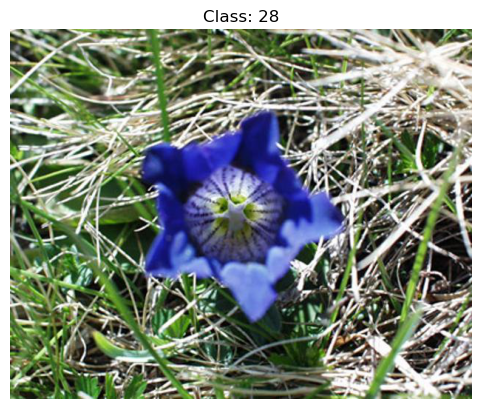

In [22]:
import matplotlib.pyplot as plt
import random

# Get the number of samples in the dataset
num_samples = len(file_paths)

# Generate a random index
random_index = random.randint(0, num_samples - 1)

# Get the random image and its corresponding class label
random_image_path = file_paths[random_index]
random_class_label = classes[random_index]

# Load and plot the random image
random_image = plt.imread(random_image_path)
plt.imshow(random_image)
plt.title(f"Class: {random_class_label}")
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


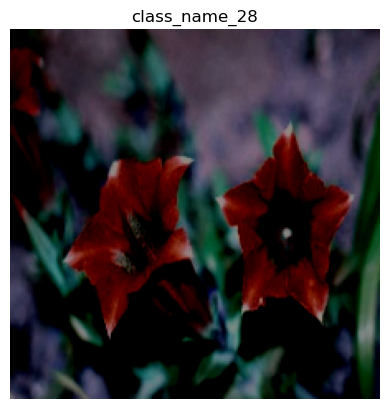

In [23]:
import matplotlib.pyplot as plt

# Flag to check if any image from class 3 is found
found_class = False
number_of_class=28
# Iterate through the train_dataset
for image, label_info in train_dataset:
    label = label_info[0].numpy()  # Get the label as an integer
    if int(label) == number_of_class:
        # Normalize the image data
        normalized_image = image[0].numpy() / 255.0  # Assuming the pixel values are in the range [0, 255]

        # Plot the image
        plt.imshow(normalized_image)
        plt.title(class_names[number_of_class])  # Assuming class 3 corresponds to index 3 in class_names
        plt.axis('off')
        plt.show()
        found_class = True
        break

# Check if any image from class 3 is found
if not found_class:
    print("There is no image from class 3.")


# double check

In [ ]:
import os

# Create a dictionary to store the count of images in each class
class_count = {}

# Iterate through the directory to count images in each class
for filename in os.listdir(directory):
    label = get_label_for_index(extract_index(filename))
    class_count[label] = class_count.get(label, 0) + 1

# Sort the class count dictionary by class name
sorted_class_count = {k: v for k, v in sorted(class_count.items())}

# Print the count of images in each class
for label, count in sorted_class_count.items():
    print(f"Class {label}: {count} images")

I have 3 different data_set containing different images train_dataset.element_spec is 
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))

write a code to print any equal iitem found in all three datasets. If there are no equal item, it will print a corresponding message.


In [25]:
# Initialize a list to store common items
common_items = []

# Extract elements from datasets
train_elements = [item[0] for item in train_dataset.as_numpy_iterator()]
valid_elements = [item[0] for item in valid_dataset.as_numpy_iterator()]
test_elements = [item[0] for item in test_dataset.as_numpy_iterator()]

# Convert elements to strings for comparison
train_str_elements = [str(item) for item in train_elements]
valid_str_elements = [str(item) for item in valid_elements]
test_str_elements = [str(item) for item in test_elements]

# Iterate through the elements in the first dataset
for item_str in train_str_elements:
    # Check if the item is present in both other datasets
    if item_str in valid_str_elements and item_str in test_str_elements:
        # If found in all datasets, add it to the list of common items
        common_items.append(item_str)

# Print the result
if common_items:
    print("Common items found in all three datasets:")
    for item in common_items:
        print(item)
else:
    print("No common items found in all three datasets.")


No common items found in all three datasets.


In [80]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 102), dtype=tf.float32, name=None))>

In [33]:
valid_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
list(train_dataset)[-1]

In [ ]:
# See an example batch of data
for images, labels in train_dataset.take(1):
  print(images, labels)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

# create checkpoint function to save model for later

In [27]:
#create checkpoint function to save model for later

checkpoint_path="flower_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      monitor="val_accuracy",
                                                      save_best_only=True)

# ResNet Model /efficientnet.EfficientNetB0

f you want to change the label format from one-hot encoded (where each label is represented as a single integer) to a categorical format (where each label is represented as a vector with a length equal to the number of classes, with a value of 1 in the index corresponding to the class and 0 elsewhere), you can do so before training your ResNet model.

In [51]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 102), dtype=tf.float32, name=None))>

In [52]:
import tensorflow as tf
import os

# Assume you have functions `get_label_for_index` and `extract_index` defined.

# Step 1: Load file paths and labels
directory = 'C:/Users/Dell/Flowers/102flowers/jpg'
file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]
classes = [get_label_for_index(extract_index(filename)) for filename in os.listdir(directory)]

# Step 2: Create a dictionary to store file paths for each class
class_file_paths = {}
for file_path, label in zip(file_paths, classes):
    if label not in class_file_paths:
        class_file_paths[label] = []
    class_file_paths[label].append(file_path)

# Step 3: Split the data into train, validation, and test sets
train_dataset = []
valid_dataset = []
test_dataset = []

for label, paths in class_file_paths.items():
    train_dataset.extend(paths[:30])
    valid_dataset.extend(paths[30:40])
    test_dataset.extend(paths[40:])

# Step 4: Shuffle the datasets
import random
random.shuffle(train_dataset)
random.shuffle(valid_dataset)
random.shuffle(test_dataset)

# Step 5: Define a function to preprocess the images
def preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img, label

# Step 6: Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_dataset, [get_label_for_index(extract_index(filename)) for filename in train_dataset]))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_dataset, [get_label_for_index(extract_index(filename)) for filename in valid_dataset]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_dataset, [get_label_for_index(extract_index(filename)) for filename in test_dataset]))

# Step 7: Map preprocessing function to datasets
train_dataset = train_dataset.map(preprocess_image)
valid_dataset = valid_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

# Step 8: Ensure compatibility and batching
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
valid_dataset = valid_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Step 9: Convert labels to categorical format
def convert_to_categorical(image, label):
    label = tf.one_hot(label, 102)  # Assuming there are 102 classes
    return image, label

train_dataset = train_dataset.map(convert_to_categorical)
valid_dataset = valid_dataset.map(convert_to_categorical)
test_dataset = test_dataset.map(convert_to_categorical)

# Step 10: Add class names to datasets
class_names = [f'class_name_{label}' for label in range(102)]  # Assuming there are 102 classes
train_dataset.class_names = class_names
valid_dataset.class_names = class_names
test_dataset.class_names = class_names


In [53]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 102), dtype=tf.float32, name=None))>

In [63]:
#import the required module for model creation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing




data_augmentation=Sequential([layers.RandomFlip("horizontal"),
                              layers.RandomRotation(0.2),
                              layers.RandomZoom(0.2),
                              layers.RandomHeight(0.2),
                              layers.RandomWidth(0.2),
                              #preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
                              ],
                             name="data_augmentation")


#setup base model and freeze its layer
#resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
base_model=tf.keras.applications.ResNet50(include_top=False)
#base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable=False
#set up model architecture with trainable top layersj
inputs=layers.Input(shape=(224, 224, 3), name="input_layer")#shape of input layer
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs=layers.Dense(Total_class,activation="softmax",name="output_layer")(x)#outputlayer shape
#Total_class=102 ,len(train_dataset.class_names)
resnet_model=tf.keras.Model(inputs,outputs)

resnet_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
resnet_history = resnet_model.fit(train_dataset,
                                  epochs=5,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=valid_dataset,
                                  validation_steps=len(valid_dataset),
                                  # validation_steps=int(0.25 * len(valid_dataset)),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]
                                 ) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240420-075417
Epoch 1/5
96/96 [==============================] - 305s 3s/step - loss: 2.9026 - accuracy: 0.3908 - val_loss: 1.3499 - val_accuracy: 0.6765
Epoch 2/5
96/96 [==============================] - 303s 3s/step - loss: 1.0789 - accuracy: 0.7850 - val_loss: 0.8885 - val_accuracy: 0.7696
Epoch 3/5
96/96 [==============================] - 296s 3s/step - loss: 0.7046 - accuracy: 0.8595 - val_loss: 0.7568 - val_accuracy: 0.7931
Epoch 4/5
96/96 [==============================] - 295s 3s/step - loss: 0.4999 - accuracy: 0.9052 - val_loss: 0.6849 - val_accuracy: 0.8147
Epoch 5/5
96/96 [==============================] - 298s 3s/step - loss: 0.4145 - accuracy: 0.9114 - val_loss: 0.6134 - val_accuracy: 0.8304


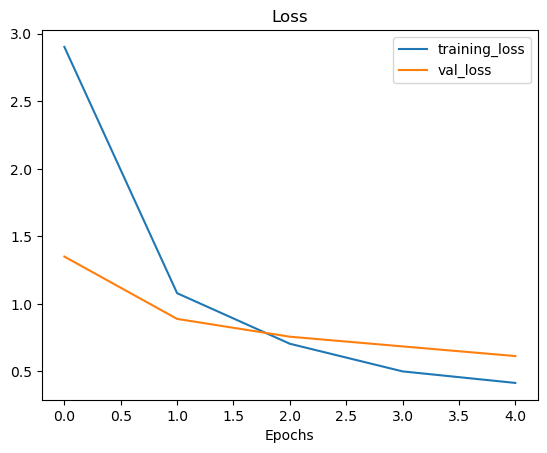

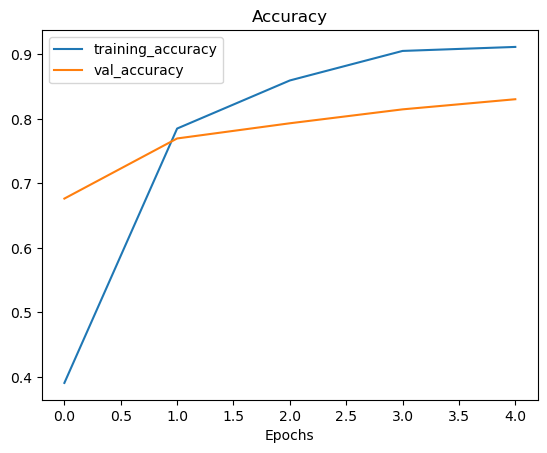

In [64]:
plot_loss_curves(resnet_history)

When "Training_accuracy" and "validation_accuracy" cross each others, it means there is overfitting.

In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [66]:
# Check summary of model constructed with Functional API
resnet_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling (Gl  (None, 2048)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 102)               208998    
                                                           

In [ ]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

In [68]:
len(train_dataset.class_names)

102

# Model 1: Feature extraction transfer learning with data augmentation

The important thing to remember is data augmentation only runs during training. So if we were to evaluate or use our model for inference (predicting the class of an image) the data augmentation layers will be automatically turned off.

In [93]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(102, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

initial_epochs = 5
history_resnet_2 = model_1.fit(train_dataset,
                    epochs=initial_epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=int(0.25* len(valid_dataset)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240420-103853
Epoch 1/5
96/96 [==============================] - 253s 3s/step - loss: 2.9067 - accuracy: 0.3882 - val_loss: 1.2876 - val_accuracy: 0.7109
Epoch 2/5
96/96 [==============================] - 245s 3s/step - loss: 1.0999 - accuracy: 0.7716 - val_loss: 0.8675 - val_accuracy: 0.7852
Epoch 3/5
96/96 [==============================] - 247s 3s/step - loss: 0.6998 - accuracy: 0.8562 - val_loss: 0.6672 - val_accuracy: 0.8164
Epoch 4/5
96/96 [==============================] - 242s 3s/step - loss: 0.5134 - accuracy: 0.8971 - val_loss: 0.6096 - val_accuracy: 0.8398
Epoch 5/5
96/96 [==============================] - 241s 3s/step - loss: 0.4089 - accuracy: 0.9160 - val_loss: 0.5492 - val_accuracy: 0.8516


In [95]:
# Check out model summary
model_1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 102)               2089

In [96]:
# Evaluate on the test data
results__data_aug = model_1.evaluate(valid_dataset)
results__data_aug
     

32/32 [==============================] - 68s 2s/step - loss: 0.6364 - accuracy: 0.8275


[0.6363574862480164, 0.8274509906768799]

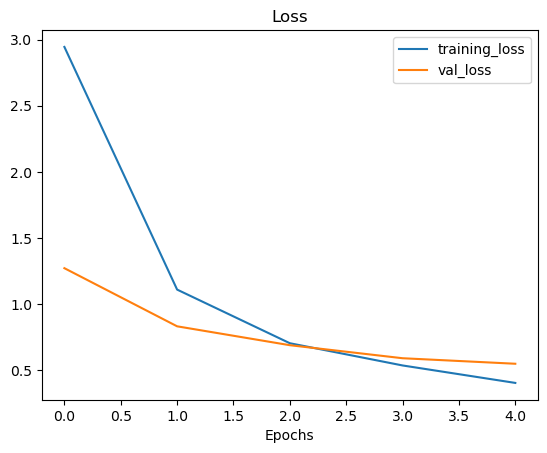

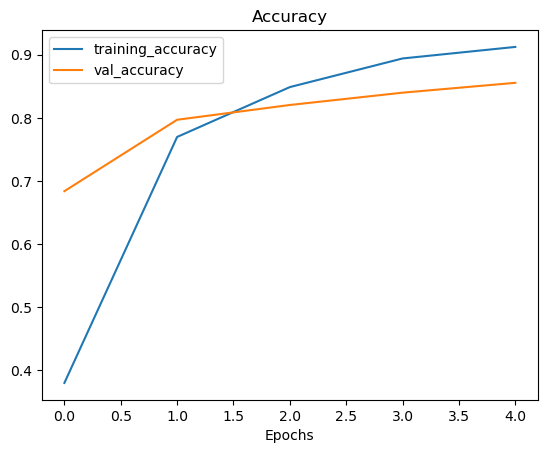

In [79]:
plot_loss_curves(history_resnet_2)

# Model 2: Feature extraction transfer learning 

In [ ]:
# Layers in loaded model
model_1.layers

In [ ]:
for layer_number, layer in enumerate(model_1.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")
     

In [84]:
# Access the base_model layers of model_2
model_1_base_model = model_1.layers[2]
model_1_base_model.name

'resnet50'

In [86]:
# How many layers are trainable in our model_2_base_model?
print(len(model_1_base_model.trainable_variables)) # layer at index 2 is the EfficientNetV2B0 layer (the base model)

0


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [88]:
# Make all the layers in model_2_base_model trainable
model_1_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_1_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [91]:
print(len(model_1.trainable_variables))

14


In [98]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_resnet = model_1.fit(train_dataset,
                                               epochs=fine_tune_epochs,
                                               validation_data=valid_dataset,
                                               initial_epoch=history_resnet_2.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(valid_dataset)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately
     

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240420-110113
Epoch 5/10
96/96 [==============================] - 245s 3s/step - loss: 0.3371 - accuracy: 0.9278 - val_loss: 0.5119 - val_accuracy: 0.8594
Epoch 6/10
96/96 [==============================] - 244s 3s/step - loss: 0.2911 - accuracy: 0.9359 - val_loss: 0.4768 - val_accuracy: 0.8750
Epoch 7/10
96/96 [==============================] - 246s 3s/step - loss: 0.2361 - accuracy: 0.9526 - val_loss: 0.4892 - val_accuracy: 0.8711
Epoch 8/10
96/96 [==============================] - 247s 3s/step - loss: 0.2141 - accuracy: 0.9529 - val_loss: 0.4926 - val_accuracy: 0.8711
Epoch 9/10
96/96 [==============================] - 247s 3s/step - loss: 0.1839 - accuracy: 0.9611 - val_loss: 0.4944 - val_accuracy: 0.8516
Epoch 10/10
96/96 [==============================] - 246s 3s/step - loss: 0.1770 - accuracy: 0.9608 - val_loss: 0.4654 - val_accuracy: 0.8672


In [101]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_1.evaluate(valid_dataset)

32/32 [==============================] - 69s 2s/step - loss: 0.5650 - accuracy: 0.8471


In [102]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.38823530077934265, 0.7715686559677124, 0.8562091588973999, 0.8970588445663452, 0.9160130620002747, 0.9277777671813965, 0.9359477162361145, 0.9526143670082092, 0.9529411792755127, 0.9611111283302307, 0.9607843160629272]


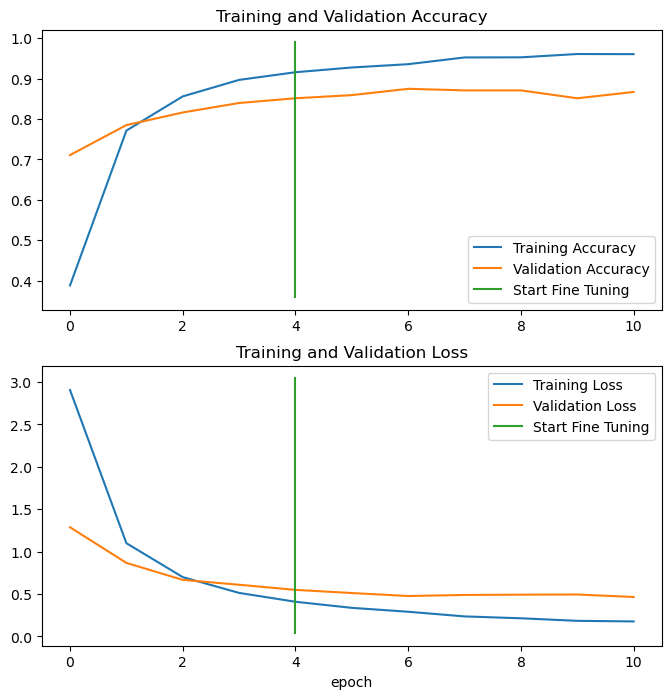

In [104]:
compare_historys(original_history=history_resnet_2,
                 new_history=history_fine_resnet,
                 initial_epochs=5)